In [10]:
import pandas as pd

archivo_excel = './interests_scholar_profile3.xlsx'
df = pd.read_excel(archivo_excel)

In [15]:
from translate import Translator

translator = Translator(to_lang='en', from_lang='es')

def translate_terms(cadena):
    try:
        return translator.translate(cadena)
    except Exception as e:
        print(f"Error to translate '{cadena}': {e}")
        return cadena

In [17]:
df['trans'] = df['Interest Areas'].apply(translate_terms)

In [82]:
def df2dict(df):
    return df.to_dict(orient='records')

data = df2dict(df[["Researcher", "trans"]].rename(columns={"trans": "Interest Areas"}))

# remove empty values

data = [d for d in data if d["Interest Areas"] != "No interest areas found"]

#split by comma Interest areas of each researcher

# for d in data:
#     d["Interest Areas"] = d["Interest Areas"].split(",")
#     d["Interest Areas"] = [x.strip() for x in d["Interest Areas"]]

print(data)

[{'Researcher': 'Omar Caceres', 'Interest Areas': 'Molecular Biology, Genomics, Bioinformatics, Phylogeny'}, {'Researcher': 'Ronnie G. Gavilan', 'Interest Areas': 'molecular epidemiology, microbial genomics, microbial evolution, Public Health'}, {'Researcher': 'Victor Jiménez-Vásquez, MSc.', 'Interest Areas': 'Molecular Epidemiology, Molecular Biology, Evolution'}, {'Researcher': 'Edwin Alberto Mellisho Salas', 'Interest Areas': 'Animal biotechnology, embryo transfer, spermatogenesis, cellular communication'}, {'Researcher': 'Michelle C. Chirinos-Arias, Ph.D.', 'Interest Areas': 'Molecular Biology, Genetics, Bioinformatics, DNA repair, sts'}, {'Researcher': 'Dan Erick Vivas Ruiz', 'Interest Areas': 'Biochemistry, Molecular Biology, Cytogenetics, Systematics'}, {'Researcher': 'Gustavo Adolfo Sandoval Peña', 'Interest Areas': 'Biotechnology, Structural Bioinformatics, Computational Biology, Systems Biology'}, {'Researcher': 'Pablo Sergio Ramirez Roca', 'Interest Areas': 'genomics, proteo

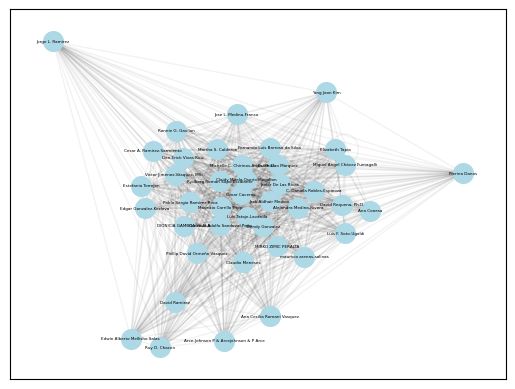

In [327]:
"""
Researcher	Interest Areas
Omar Caceres	Molecular Biology, Genomics, Bioinformatics, Phylogeny
Ronnie G. Gavilan	molecular epidemiology, microbial genomics, microbial evolution, Public Health
Victor Jiménez-Vásquez, MSc.	Molecular Epidemiology, Molecular Biology, Evolution
Edwin Alberto Mellisho Salas	Animal biotechnology, embryo transfer, spermatogenesis, cellular comunication
"""

# Each Researcher is a corpus, and the Interest Areas are the documents

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = [x['Interest Areas'] for x in data]
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
cosine_sim = cosine_similarity(X, X)

# Draw newtwork showing the similarity between researchers
# also show the interest areas of each researcher around the node

import networkx as nx
import matplotlib.pyplot as plt

#no randomness in the layout

G = nx.Graph()

for i, researcher in enumerate(data):
    G.add_node(researcher['Researcher'])
    G.nodes[researcher['Researcher']]['interests'] = researcher['Interest Areas']
    G.nodes[researcher['Researcher']]['pos'] = (i, 0)

for i in range(len(data)):
    for j in range(i+1, len(data)):
        G.add_edge(data[i]['Researcher'], data[j]['Researcher'], weight=cosine_sim[i][j])

# for node in G.nodes:
#     # plot interest areas around the node
#     pos = G.nodes[node]['pos']
#     interests = G.nodes[node]['interests']

#     for i, interest in enumerate(interests.split(",")):
#         G.add_node(f"{node}_{i}")
#         G.nodes[f"{node}_{i}"]['pos'] = (pos[0], pos[1] + i + 1)
#         G.add_edge(node, f"{node}_{i}", weight=0)
#         G.nodes[f"{node}_{i}"]['interest'] = interest


pos = nx.spring_layout(G, seed=42)

# nx.draw_networkx_edges(G, pos, edge_color='pink', width=10, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=3, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edge_color='black', width=1, alpha=0.05)


plt.show()

In [267]:
#use openalex to retrive topics from David Requena

from pyalex import Authors
from itertools import chain
import pyalex

pyalex.config.email = "george.munoz@unmsm.edu.pe"

def searchAuthors(authorObj):
    #try to search by ORCID, if HTTPError then search by display_name
    try:
        orcid = authorObj['ORCID']
        author = Authors()['https://orcid.org/' + orcid]
    except Exception as e:
        try:
            display_name = authorObj['Researcher']
            query = Authors().search_filter(display_name=display_name)
            author = next(chain(*query.paginate(per_page=200)))
        except Exception as e:
            display_name = authorObj['Names']
            query = Authors().search_filter(display_name=display_name)
            author = next(chain(*query.paginate(per_page=200)))

    return author

In [254]:
file1 = "./interests_scholar_profile3.xlsx"
file2 = "./ponentes2.tsv"

df1 = pd.read_excel(file1)
df2 = pd.read_csv(file2, sep="\t")

#merge df1 and df2 by df1["Researcher"] and df2["ScholarName"], if df2["ScholarName"] is not in df1["Researcher"] set NaN 

newDf = pd.merge(df1, df2, left_on="Researcher", right_on="ScholarName", how="left")

#compare shapes 

print(df1.shape, df2.shape, newDf.shape)
    

(43, 2) (58, 6) (43, 8)


In [271]:
#get records for all researchers in data["Researcher"]

records = []

for i, row in newDf.iterrows():
    
    print(f"Processing {i} of {newDf.shape[0]}")

    record = searchAuthors(row)
    records.append(record)

Processing 0 of 43
Processing 1 of 43
Processing 2 of 43
Processing 3 of 43
Processing 4 of 43
Processing 5 of 43
Processing 6 of 43
Processing 7 of 43
Processing 8 of 43
Processing 9 of 43
Processing 10 of 43
Processing 11 of 43
Processing 12 of 43
Processing 13 of 43
Processing 14 of 43
Processing 15 of 43
Processing 16 of 43
Processing 17 of 43
Processing 18 of 43
Processing 19 of 43
Processing 20 of 43
Processing 21 of 43
Processing 22 of 43
Processing 23 of 43
Processing 24 of 43
Processing 25 of 43
Processing 26 of 43
Processing 27 of 43
Processing 28 of 43
Processing 29 of 43
Processing 30 of 43
Processing 31 of 43
Processing 32 of 43
Processing 33 of 43
Processing 34 of 43
Processing 35 of 43
Processing 36 of 43
Processing 37 of 43
Processing 38 of 43
Processing 39 of 43
Processing 40 of 43
Processing 41 of 43
Processing 42 of 43


In [325]:
#plot topics overall for all researchers

from collections import Counter

topics = {}

for record in records:
    author_topics = []
    for topic in record['topics']:
        # topic_name = topic["display_name"]
        topic_name = topic["field"]["display_name"]
        if topic_name in topics.keys() and topic_name not in author_topics:
            topics[topic_name] += 1
            author_topics.append(topic_name)
        elif topic_name not in topics.keys():
            topics[topic_name] = 1
            author_topics.append(topic_name)
    # print(author_topics)


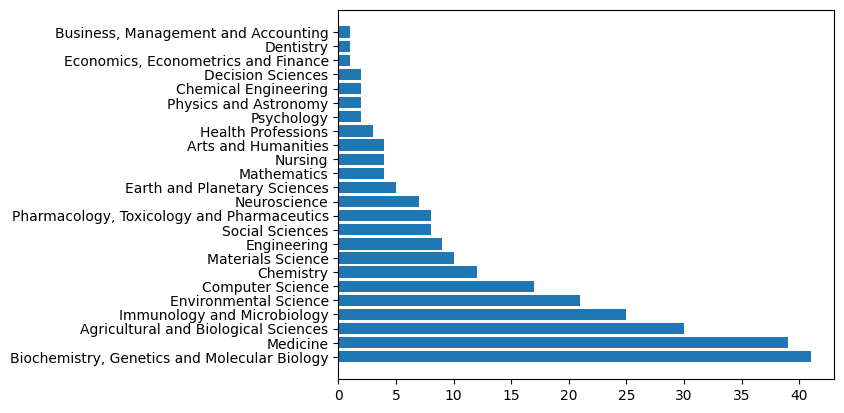

In [326]:
#plot topics 
#sort by value count

import matplotlib.pyplot as plt

topics = dict(sorted(topics.items(), key=lambda item: item[1], reverse=True))

# plt.figure(figsize=(10, 20))
plt.barh(topics.keys(), topics.values())

plt.show()